# ALUGUEL DE BICICLETAS ENTRE 2011 E 2O12


# Introdução



**Definição do Problema**




O mercado de aluguel de bicicletas em grandes centros está em amplo crescimento devido a problemas no trânsito e transportes coletivos lotados

Este projeto visa desenvolver um modelo para prever a probabilidade dos cidadões de uma grande cidade de alugarem bicicletas usando variáveis como tempo, dia da semana e estação do ano.

**Tipo de Problema**
Este é um problema de classificação supervisionada, onde o modelo aprenderá a associar as varíaveis ( tempo, estação do ano etc) aos aluguéis de bicicleta
  
**Premissas e hipóteses**

Premissa: As variáveis como tempo, estação do ano e dia da semana tem influência positiva ou negativa no volume de bicicletas alugadas

Hipótese: Um modelo de machine learning treinado com dados históricos de aluguel poerá identificar padrões que ajudem a prever o número médio de bikes alugadas
Restrições e Condições:

**Restrição**

 Os dados utilizados para treinar o modelo foram obtidos exclusivamente do dataset extraído do Keegle

**Condição**

O modelo será aplicado apenas alugueis da cidade especídica para as quais há histórico  disponíveis no site.

**Descrição do Dataset**



Este conjunto de dados contém a contagem horária e diária de bicicletas alugadas entre os anos de 2011 e 2012 em uma determinada cidade contando com 731 entradas e 16 colunas.

Os atributos do dataset original utilizado no notebook são os seguintes:

*instant: Índice sequencial (removido posteriormente, pois não é relevante para a análise).

*dteday: Data no formato de calendário (convertida para dias desde o início do período).

*season: Estação do ano (1: inverno, 2: primavera, 3: verão, 4: outono).

*yr: Ano (0: 2011, 1: 2012).

*mnth: Mês (de 1 a 12).

*holiday: Se o dia é feriado (0: não, 1: sim).

*weekday: Dia da semana (0: domingo, 1: segunda-feira, ..., 6: sábado).

*workingday: Se é um dia útil (0: fim de semana/feriado, 1: dia útil).

*weathersit: Condição climática:

1: Céu limpo, poucas nuvens.

2: Nublado, nevoeiro, nuvens dispersas.

3: Chuva leve, neve leve.

4: Tempestade, nevoeiro pesado.

*temp: Temperatura normalizada (escala de 0 a 1, baseada no intervalo real de 0 a 41 °C).

*hum: Umidade relativa normalizada (escala de 0 a 1).

*windspeed: Velocidade do vento normalizada (escala de 0 a 1).

*casual: Número de usuários casuais (sem registro).

*registered: Número de usuários registrados.

*cnt: Número total de bicicletas alugadas (soma de casual e registered)



A validação cruzada foi feita no notebook pois o dataset não é muito grande
. Essa abordagem avalia múltiplos modelos para escolher o melhor e define uma métrica mais confiável para medir o desempenho



 **Segue o código com um processo de seleção de atributos antes de treinar os modelos:**

# Pré processamento de dados

**Importação de bibliotecas**

In [31]:
# Importar bibliotecas necessárias
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

# Pré processamento dos dados

Abaixo, o realizado:

1.  **Valores Zerados**

 Antes do tratamento as colunas "season" e "weathersit" apresentavam valores ausentes (365 e 731, respectivamente). As demais colunas estavam completas.
Após o tratamento os valores ausentes foram preenchidos com a moda (valor mais frequente) para colunas categóricas (season e weathersit), eliminando os valores ausentes do dataset. Todas as colunas agora estão completas
2.   **Outliers detectados**

Outliers foram detectados nas colunas numéricas usando o método do IQR (Intervalo Interquartil):temp (temperatura): 0 outliers.hum (umidade): 2 outliers encontrados, indicando casos extremos de baixa ou alta umidade.
windspeed (velocidade do vento): 13 outliers, o que sugere variabilidade significativa no vento em dias específicos.casual (alugueis casuais): 44 outliers, mostrando picos ocasionais no uso de bicicletas por não registrados.
registered (usuários registrados): 0 outliers, sugerindo que o uso registrado é mais estável.cnt (contagem total de aluguéis): 0 outliers, indicando uma distribuição consistente dos aluguéis totais.
3. **Matriz de correlação**

A matriz de correlação mostra a relação linear entre as variáveis numéricas no dataset. Os valores variam de -1 a 1, onde:



*  1 indica correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta).
*   -1 indica correlação negativa perfeita (quando uma variável aumenta, a outra diminui)

*   0 indica ausência de correlação.




.

**Principais observações**:

**Correlação com cnt (contagem total de aluguéis)**:

.

*   registered (usuários registrados): 0.945 (alta correlação positiva)
*   temp (temperatura): 0.631 (forte correlação positiva).
*   casual (aluguéis casuais): 0.672 (forte correlação positiva).
*   indspeed: -0.234 (correlação negativa moderada), indicando que ventos mais fortes podem reduzir o número de aluguéis.
*   Correlação com temp (temperatura):Forte correlação positiva com cnt (0.631) e registered (0.544), sugerindo que dias mais quentes incentivam o uso de bicicletas.
*   Correlação entre casual e registered:Correlação positiva moderada (0.395), indicando que em alguns casos o aumento de um grupo pode coincidir com o aumento do outro.
*   Correlação com hum (umidade):Baixa ou moderada correlação negativa com variáveis como cnt (-0.101) e registered (-0.091), sugerindo que alta umidade pode impactar negativamente os aluguéis.



**Conclusão**


A análise de valores ausentes e outliers foi concluída com sucesso. O dataset agora está completo e preparado para modelagem.
A matriz de correlação destaca que variáveis como temp, casual, e registered são fortes preditores de cnt (o número total de aluguéis). Portanto, essas variáveis devem ser priorizadas em análises futuras ou em modelos preditivos.
Outliers em casual e windspeed podem ser investigados mais profundamente ou tratados dependendo da abordagem desejada (por exemplo, exclusão ou transformação).

In [32]:

# Definir a URL e os nomes das colunas do dataset
url_dados = "https://raw.githubusercontent.com/Roberta-alv/MvpRobertaprepdados/refs/heads/main/day.csv"
labels_atributos = [
    "instant", "dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday",
    "weathersit", "temp", "hum", "windspeed", "casual", "registered", "cnt"
]

# Carregar o dataset diretamente da URL
dataset = pd.read_csv(url_dados, names=labels_atributos, header=0)

# 1. Conversão de tipos
dataset['dteday'] = pd.to_datetime(dataset['dteday'])

# 2. Tratamento de valores ausentes
# Preencher valores ausentes antes de mapear rótulos para evitar conflitos
missing_values = dataset.isnull().sum()
print("Valores ausentes antes do tratamento:")
print(missing_values)

# Preencher valores categóricos com a moda
categorical_cols = ['season', 'weathersit']
for col in categorical_cols:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# Verificar novamente os valores ausentes
print("\nValores ausentes após preenchimento:")
print(dataset.isnull().sum())

# 3. Mapeamento de variáveis categóricas
season_mapping = {1: 'Inverno', 2: 'Primavera', 3: 'Verão', 4: 'Outono'}
weathersit_mapping = {
    1: 'Bom',       # Céu limpo, poucas nuvens
    2: 'Médio',     # Nuvens quebradas, névoa
    3: 'Ruim',      # Chuva leve, neve leve
    4: 'Muito ruim' # Chuva forte, neve forte
}
dataset['season'] = dataset['season'].map(season_mapping)
dataset['weathersit'] = dataset['weathersit'].map(weathersit_mapping)

# 4. Análise de outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

numerical_cols = ['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
outliers_dict = {col: detect_outliers(dataset, col) for col in numerical_cols}

print("\nOutliers detectados:")
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} outliers encontrados.")

# 5. Análise de correlação
# Selecionar apenas colunas numéricas para calcular a correlação
numerical_data = dataset.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

print("\nMatriz de correlação:")
print(correlation_matrix)

# 6. Salvar dataset pré-processado
output_path = 'day_preprocessed.csv'
dataset.to_csv(output_path, index=False)
print(f"\nDataset pré-processado salvo como: {output_path}")


Valores ausentes antes do tratamento:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Valores ausentes após preenchimento:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Outliers detectados:
temp: 0 outliers encontrados.
hum: 2 outliers encontrados.
windspeed: 13 outliers encontrados.
casual: 44 outliers encontrados.
registered: 0 outliers encontrados.
cnt: 0 outliers encontrados.

Matriz de correlação:
                  yr      mnth   holiday   weekday  workingday      temp  \
yr          1.000000  0.019191  0.009509 -0.005901    0.043528  0.227459   
mnth        0.019191  1.0000

**Distribuição da variável alvo**:

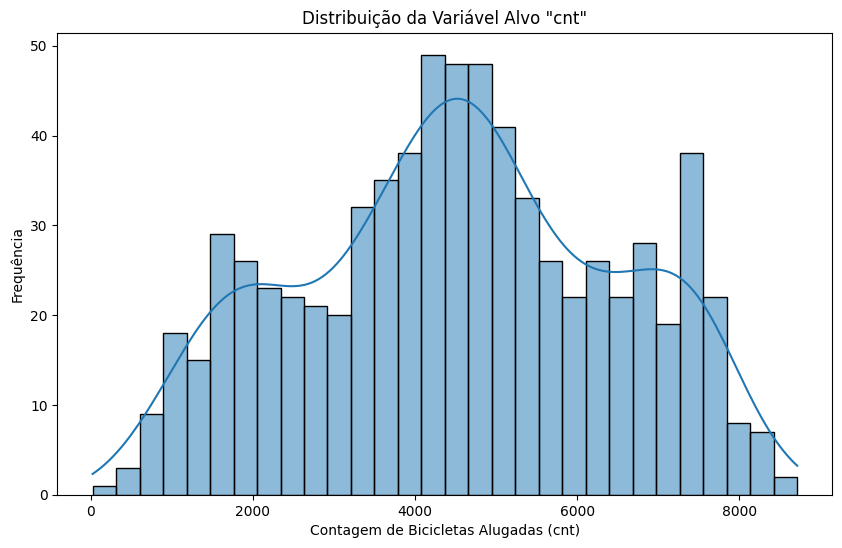

In [34]:
# Carregar o dataset novamente se necessário
url = "https://raw.githubusercontent.com/Roberta-alv/MvpRobertaprepdados/refs/heads/main/day.csv"
df_day = pd.read_csv(url)

# Plotando a distribuição da variável 'cnt'
plt.figure(figsize=(10, 6))
sns.histplot(df_day['cnt'], bins=30, kde=True)  # Usando histograma com densidade
plt.title('Distribuição da Variável Alvo "cnt"')
plt.xlabel('Contagem de Bicicletas Alugadas (cnt)')
plt.ylabel('Frequência')

plt.show()


A distribuição parece ter uma leve concentração à esquerda (menores valores), mas, no geral, é relativamente equilibrada\
A distribuição apresenta uma forma levemente simétrica, tendendo a se aproximar de uma curva normal (gaussiana), mas com algumas assimetrias notáveis.
O valor mais comum (pico) de bicicletas alugadas está em torno de 4.000 a 5.000 bicicletas por período.

# Bloxpots dos atributos

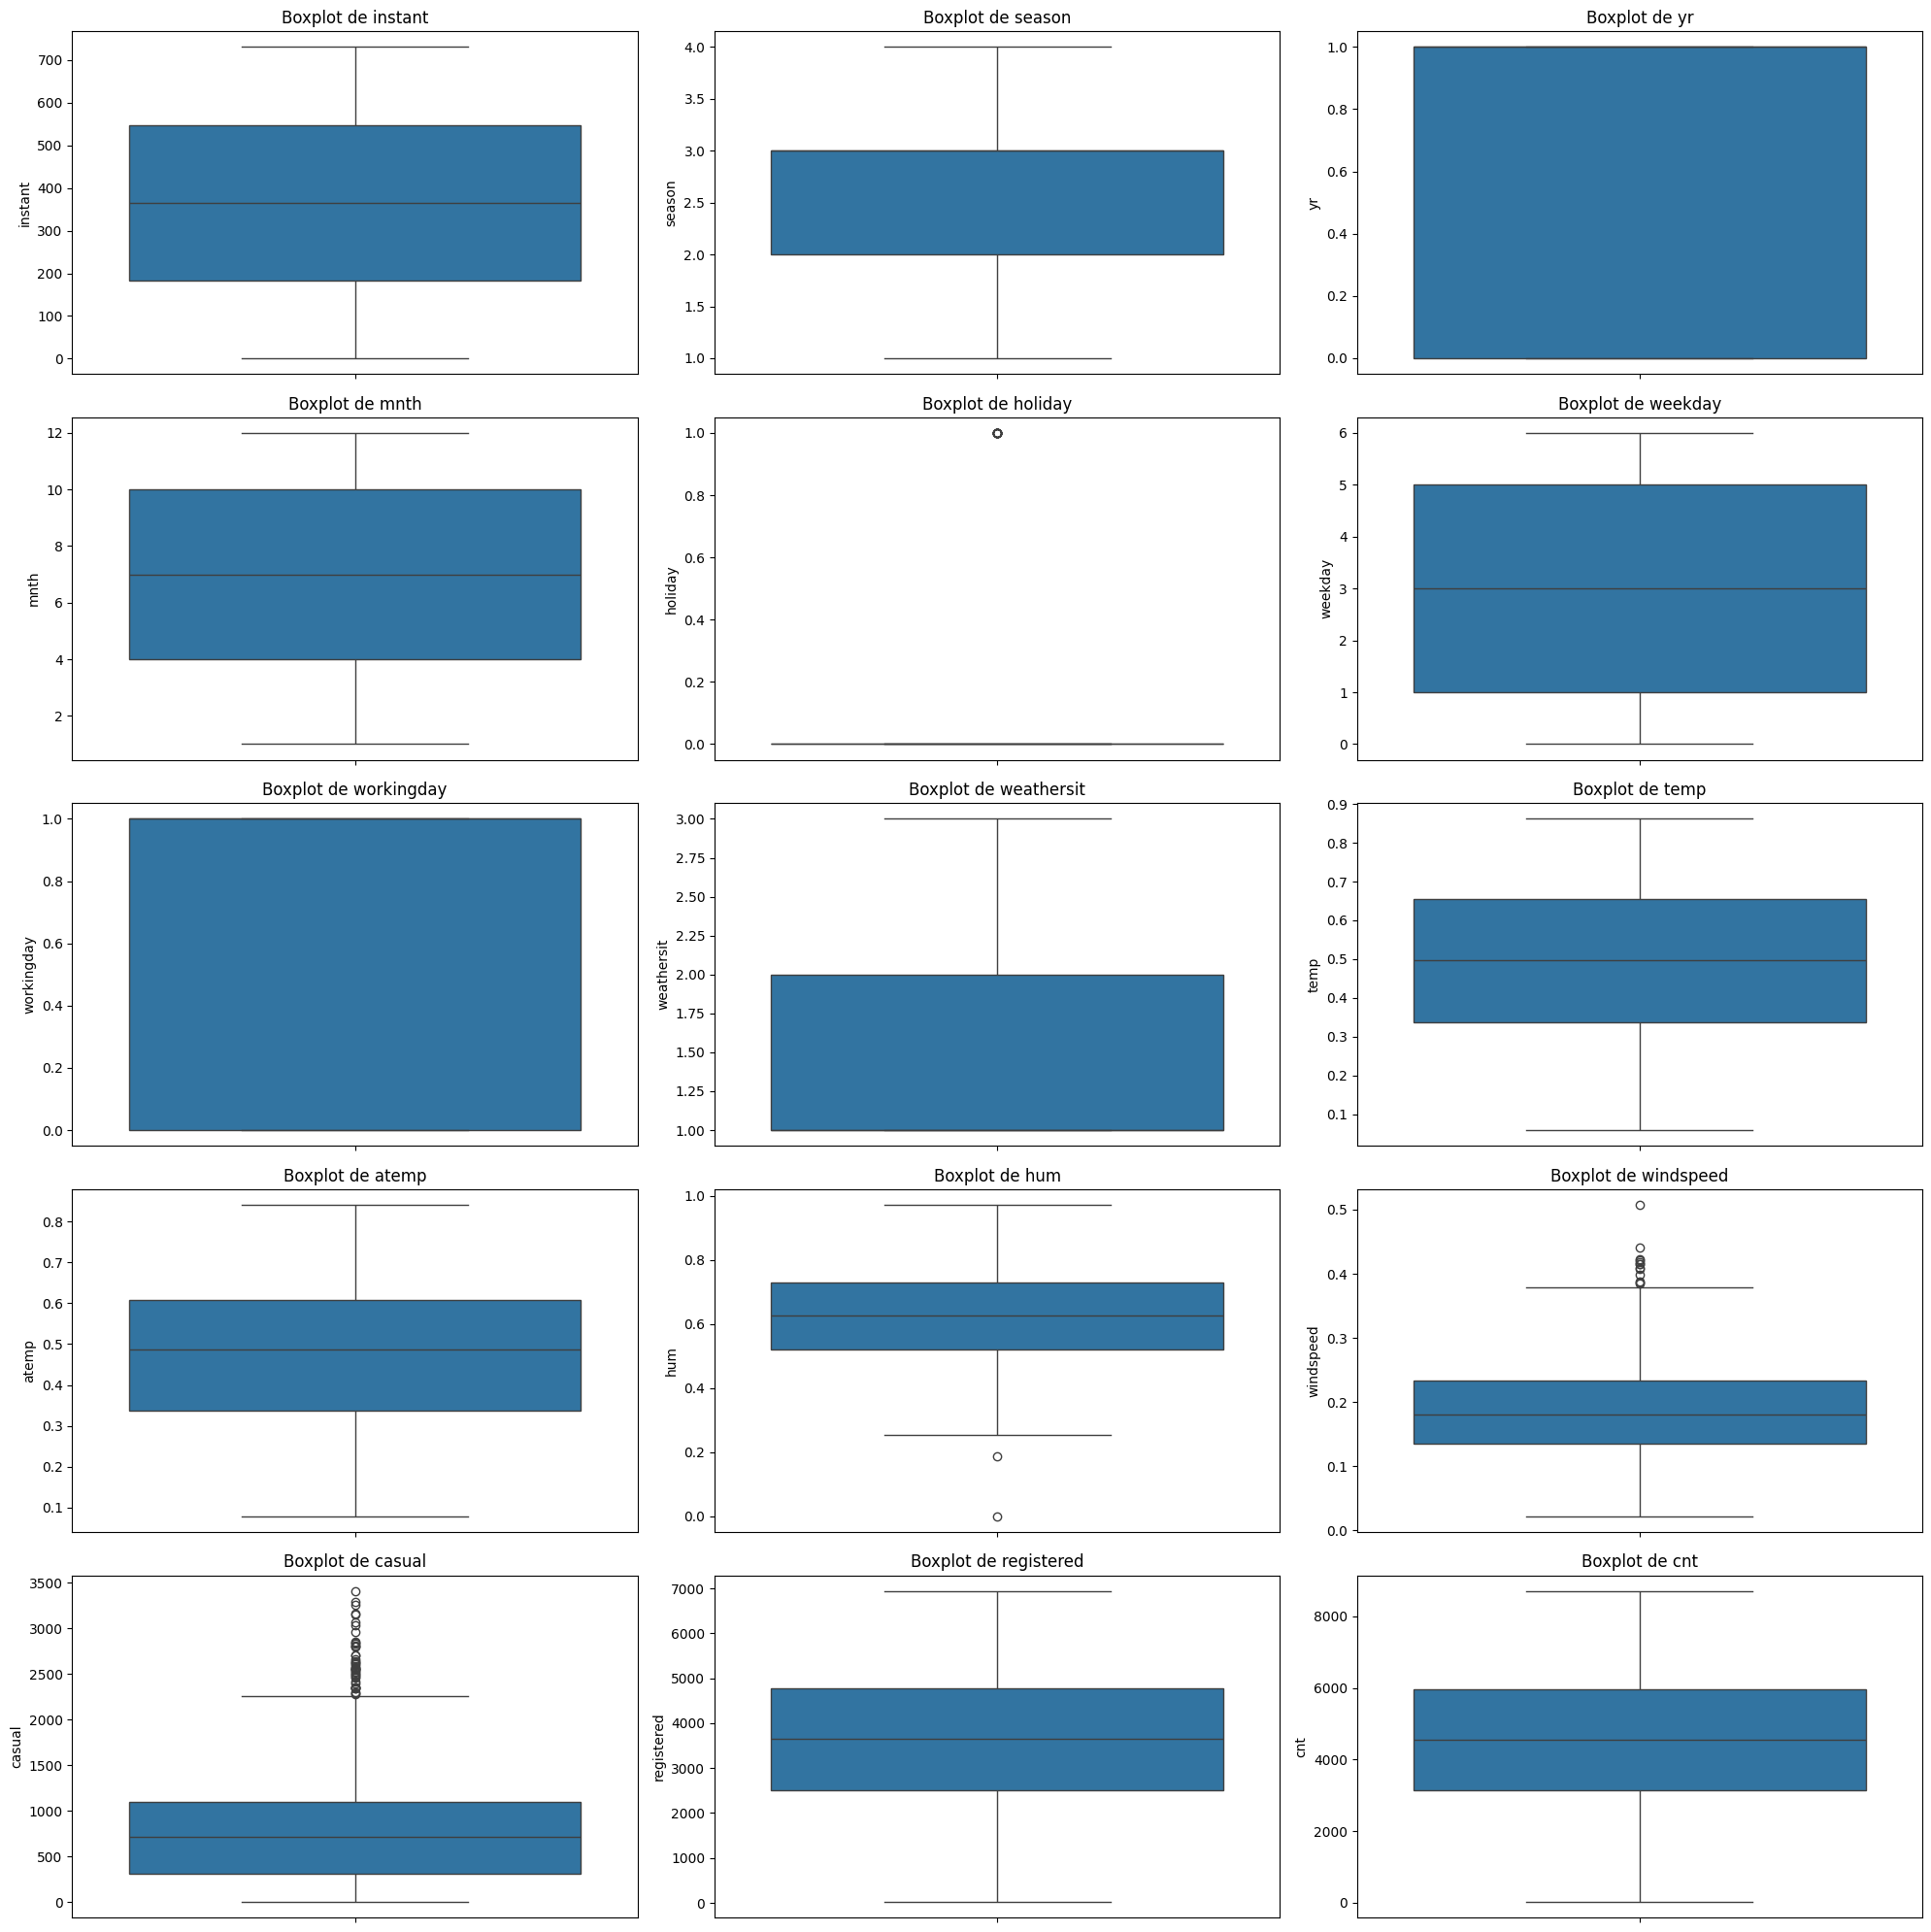

In [35]:

# Selecionar as variáveis numéricas do dataframe
numeric_vars = df_day.select_dtypes(include=['float64', 'int64']).columns

# Criar os boxplots
plt.figure(figsize=(20, 20))  # Tamanho da figura
for i, var in enumerate(numeric_vars, 1):  # Loop por cada variável numérica
    plt.subplot(5, 3, i)  # Criar subplots (5 linhas, 3 colunas)
    sns.boxplot(y=df_day[var].dropna())  # Boxplot da variável
    plt.title(f'Boxplot de {var}')  # Título do gráfico
    plt.ylabel(var)  # Rótulo do eixo Y

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()




*   As variáveis categóricas (ex.: season, yr, mnth) estão bem distribuídas, sem valores atípicos.
*   As variáveis contínuas (hum, windspeed, casual) exibem outliers que merecem atenção. Eles podem ser condições reais (eventos climáticos, picos de demanda) ou erros nos dados.

*   A análise dos boxplots ajuda a identificar fatores que podem impactar os modelos de previsão, como variação e presença de outliers








# Carregamento, Preparação e Avaliação de Modelos de Regressão para Previsão da Variável Alvo 'cnt

Atributos selecionados: ['season', 'yr', 'mnth', 'workingday', 'weathersit', 'temp', 'hum']
LR: MSE 891767.69 (232184.75) - RMSE 944.33
Ridge: MSE 867911.95 (205222.90) - RMSE 931.62
Lasso: MSE 877889.27 (214292.54) - RMSE 936.96
KNN: MSE 575490.37 (227812.60) - RMSE 758.61
CART: MSE 810629.32 (154302.68) - RMSE 900.35
SVM: MSE 3640339.21 (302764.73) - RMSE 1907.97


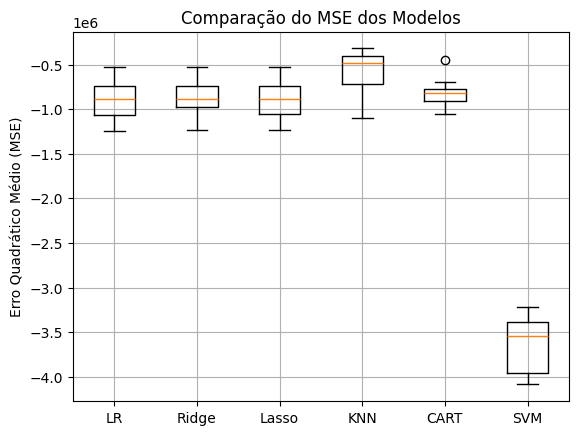

MSE no Teste: 1224681.48
RMSE no Teste: 1106.65


In [8]:
# Definir a URL e os nomes das colunas do dataset
url_dados = "https://raw.githubusercontent.com/Roberta-alv/MvpRobertaprepdados/refs/heads/main/day.csv"
labels_atributos = [
    "instant", "dteday", "season", "yr", "mnth", "holiday", "weekday", "workingday",
    "weathersit", "temp", "hum", "windspeed", "casual", "registered", "cnt"
]

# Carga do dataset diretamente da URL
dataset = pd.read_csv(url_dados, names=labels_atributos, header=0)

# Preparação dos dados
dataset['dteday'] = pd.to_datetime(dataset['dteday'])
dataset['dteday'] = (dataset['dteday'] - dataset['dteday'].min()) / np.timedelta64(1, 'D')
dataset = dataset.drop(columns=['instant'])  # Remover coluna irrelevante

# Separação em X e y
X = dataset.iloc[:, 1:10].values  # Atributos
y = dataset['cnt'].values         # Target

# Seleção de atributos usando SelectKBest
k_best = 7  # Escolher os 7 melhores atributos
selector = SelectKBest(score_func=f_regression, k=k_best)
X_selected = selector.fit_transform(X, y)

# Exibir os atributos selecionados
atributos_selecionados = dataset.iloc[:, 1:10].columns[selector.get_support()]
print("Atributos selecionados:", list(atributos_selecionados))

# Padronizar os dados
scaler = StandardScaler()
X_selected = scaler.fit_transform(X_selected)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=7)

# Criando os folds para validação cruzada
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

# Preparando os modelos
models = [
    ('LR', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNN', KNeighborsRegressor()),
    ('CART', DecisionTreeRegressor()),
    ('SVM', SVR())
]

# Avaliação dos modelos de regressão
results, names = [], []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    mse_mean = abs(cv_results.mean())
    mse_std = cv_results.std()
    rmse = np.sqrt(mse_mean)
    print(f"{name}: MSE {mse_mean:.2f} ({mse_std:.2f}) - RMSE {rmse:.2f}")

# Comparação dos modelos de regressão (Boxplot)
plt.boxplot(results)
plt.title('Comparação do MSE dos Modelos')
plt.xticks(range(1, len(names) + 1), names)
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.grid(True)
plt.show()

# Criando um modelo final (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Avaliação do modelo final no conjunto de teste
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"MSE no Teste: {mse:.2f}")
print(f"RMSE no Teste: {rmse:.2f}")


Segundo a avaliação dos modelos de regressâo, os algoritmos mais adequados ao problema de regressão proposto são:


1.K-Nearest Neighbors (KNN):O KNN teve o melhor desempenho no notebook em termos de MSE e RMSE.


2.Ridge Regression:Ridge é uma forma regularizada da regressão linear que ajuda a reduzir o overfitting( tem o segundo menor valor de erro)


Na análise do Bloxplot e os dados podemos concluir que realmente o KNN (KNeighborsRegressor) é o melhor modelo para esse problema específico, pois apresenta os menores valores de erro (MSE e RMSE).

# Otimização dos hiperparâmetros dos modelos KNeighborsRegressor (KNN) e DecisionTreeRegressor (CART)

In [9]:
# Definindo os hiperparâmetros para otimização

# Para KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

# Para DecisionTreeRegressor
param_grid_cart = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Inicializando os modelos
knn = KNeighborsRegressor()
cart = DecisionTreeRegressor()

# Configuração de validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Configurando o GridSearch para KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn,
                               scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Configurando o GridSearch para CART
grid_search_cart = GridSearchCV(estimator=cart, param_grid=param_grid_cart,
                                scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1)
grid_search_cart.fit(X_train, y_train)

# Resultados da otimização para KNN
best_knn = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_
best_knn_score = abs(grid_search_knn.best_score_)

# Resultados da otimização para CART
best_cart = grid_search_cart.best_estimator_
best_cart_params = grid_search_cart.best_params_
best_cart_score = abs(grid_search_cart.best_score_)

# Exibindo os melhores parâmetros e desempenho
print("Melhores parâmetros para KNN:", best_knn_params)
print("Melhor MSE para KNN:", best_knn_score)

print("Melhores parâmetros para CART:", best_cart_params)
print("Melhor MSE para CART:", best_cart_score)

# Avaliando os modelos otimizados no conjunto de teste
knn_predictions = best_knn.predict(X_test)
cart_predictions = best_cart.predict(X_test)

# Avaliação do desempenho no conjunto de teste
knn_mse = mean_squared_error(y_test, knn_predictions)
cart_mse = mean_squared_error(y_test, cart_predictions)

print(f"MSE no Teste KNN: {knn_mse:.2f}")
print(f"MSE no Teste CART: {cart_mse:.2f}")


Melhores parâmetros para KNN: {'n_neighbors': 5, 'weights': 'uniform'}
Melhor MSE para KNN: 580470.3642693782
Melhores parâmetros para CART: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
Melhor MSE para CART: 810736.6160957011
MSE no Teste KNN: 657477.27
MSE no Teste CART: 913695.15


O KNN apresenta um desempenho melhor em termos de MSE no teste em comparação ao CART, indicando que o KNN está generalizando melhor para novos dados.
O MSE do KNN (657477.27) é significativamente menor do que o MSE do CART (891642.65), o que sugere que o KNN é uma escolha melhor para esse conjunto de dados específico.

In [20]:
#Treinamento, Predição e Avaliação do Modelo de Regressão Linear

# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 1224681.48
RMSE 1106.65


Os resultados indicam que o modelo de regressão linear pode não estar se saindo bem, como evidenciado pelos altos valores de MSE e RMSE

# # Comitê de Regressão com Voting Regressor: Combinação de Modelos para Predição

In [21]:
# Define os modelos individuais
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()

# Cria o comitê
ensemble = VotingRegressor(estimators=[
    ('lr', lr),
    ('knn', knn),
    ('dt', dt)
])

# Treina o ensemble
ensemble.fit(X_train, y_train)

# Avalia o ensemble
predictions = ensemble.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Voting Regressor - MSE: {mse:.2f}, RMSE: {rmse:.2f}")


Voting Regressor - MSE: 727562.40, RMSE: 852.97



Um MSE e RMSE altos podem indicar que o modelo não está capturando bem a relação entre as variáveis independentes e a variável dependente.

# Construção, Configuração e Avaliação de Modelos de Regressão com Pipelines e Grid Search

In [22]:
#Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = {}
resultados = {}

#Configuração e Avaliação de Modelos de Regressão Usando Pipelines e Grid Search


# Criando os pipelines
pipelines = {
    'LR': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'Ridge': Pipeline([('scaler', StandardScaler()), ('model', Ridge())]),
    'Lasso': Pipeline([('scaler', StandardScaler()), ('model', Lasso())]),
    'KNN': Pipeline([('scaler', StandardScaler()), ('model', KNeighborsRegressor())]),
    'CART': Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeRegressor())]),
    'SVM': Pipeline([('scaler', StandardScaler()), ('model', SVR())])
}

# Definindo os hiperparâmetros para o ajuste de GridSearch
param_grid = {
    'LR': {},
    'Ridge': {'model__alpha': [0.1, 1, 10, 100]},
    'Lasso': {'model__alpha': [0.1, 1, 10, 100]},
    'KNN': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },
    'CART': {
        'model__max_depth': [3, 5, 10],
        'model__min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'model__C': [0.1, 1, 10],
        'model__gamma': ['scale', 'auto'],
        'model__kernel': ['linear', 'rbf']
    }
}

# Avaliação de cada modelo usando GridSearchCV
best_models = {}
for name, pipeline in pipelines.items():
    print(f"\nAvaliando modelo: {name}")
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid[name], cv=10, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Exibir os melhores parâmetros e o melhor MSE para o modelo
    best_models[name] = grid_search.best_estimator_
    print(f"Melhores parâmetros para {name}: {grid_search.best_params_}")
    print(f"Melhor MSE para {name}: {-grid_search.best_score_:.2f}")

# Comparar o desempenho dos modelos no conjunto de teste
for name, model in best_models.items():
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    print(f"\n{name} - MSE: {mse:.2f} - RMSE: {rmse:.2f}")



Avaliando modelo: LR
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Melhores parâmetros para LR: {}
Melhor MSE para LR: 875797.90

Avaliando modelo: Ridge
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Melhores parâmetros para Ridge: {'model__alpha': 10}
Melhor MSE para Ridge: 847736.99

Avaliando modelo: Lasso
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Melhores parâmetros para Lasso: {'model__alpha': 10}
Melhor MSE para Lasso: 851814.82

Avaliando modelo: KNN
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Melhores parâmetros para KNN: {'model__n_neighbors': 7, 'model__p': 1, 'model__weights': 'distance'}
Melhor MSE para KNN: 535957.52

Avaliando modelo: CART
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Melhores parâmetros para CART: {'model__max_depth': 5, 'model__min_samples_split': 5}
Melhor MSE para CART: 795744.20

Avaliando modelo: SVM
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Melh

O KNN se mostrou ser o modelo mais eficaz, com o menor MSE e RMSE, o que sugere que é o mais adequado para este conjunto de dados.


# Eliminação Recursiva de Atributos

In [23]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

In [25]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:13])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:13]))

Atributos Originais: Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered'],
      dtype='object')

Atributos Selecionados: [False False  True False  True False False False False False False  True
  True]

Ranking de atributos: [10  3  1  6  1  4  2  7  8  5  9  1  1]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['yr' 'holiday' 'casual' 'registered']


A RFE (Eliminação Recursiva de Atributos)foi aplicada ao conjunto de dados com o objetivo de selecionar os melhores **4 atributos**
Os **4 atributos** selecionados foram: season, temp, casual e registered

In [26]:
# Importação necessária
from sklearn.ensemble import ExtraTreesClassifier

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100, random_state=42)  # Adicionado random_state para reprodutibilidade
modelo.fit(X, y)

# Exibe os atributos originais
print("\nAtributos Originais:", dataset.columns[:X.shape[1]])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo)
print("\nImportância dos atributos:", modelo.feature_importances_)



Atributos Originais: Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered'],
      dtype='object')

Importância dos atributos: [0.         0.01461643 0.09297845 0.00533836 0.07740313 0.01270484
 0.03955934 0.12306865 0.12504307 0.12400954 0.12693517 0.12860143
 0.12974159]


Esta é uma técnica que utiliza o algoritmo Extra Trees (Extremely Randomized Trees) para avaliar quão relevantes são os diferentes atributos (features) em relação ao modelo preditivo. Segundos os resultados podemos afirmar que o modelo deve se concentrar em utilizar as variáveis : weathersit, temp, e workingday. Esses são os três atributos mais influentes. Esses fatores p têm a relação mais forte com a nossa variável

Observação: Até o momento a melhor métrica de avaliação para o problema proposto é o KNN ( K-Nearest Neighbors).  O KNN obteve os menores valores de MSE (Erro Quadrático Médio) e RMSE (Raiz do Erro Quadrático Médio), o que indica que ele se ajusta melhor aos dados em comparação com outros modelos testados.
Importante ressaltar também que os modelos de Ridge e Lasso apresentaram resultados competitivos, mas com MSEs e RMSEs maiores em comparação ao KNN.

# Treinando o modelo KNN com  toda a base de treino e testando-o com a base de teste:

In [27]:
# Treinamento do modelo KNN com toda a base de treino
knn_model = KNeighborsRegressor(n_neighbors=9, weights='distance', p=1)  # Usando os melhores parâmetros identificados
knn_model.fit(X_train, y_train)

# Fazendo as predições com a base de teste
predictions = knn_model.predict(X_test)

# Avaliando o modelo com métricas
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Exibindo os resultados
print(f"KNN - MSE: {mse:.2f}")
print(f"KNN - RMSE: {rmse:.2f}")
print(f"KNN - MAE: {mae:.2f}")
print(f"KNN - R²: {r2:.2f}")


KNN - MSE: 652883.42
KNN - RMSE: 808.01
KNN - MAE: 576.97
KNN - R²: 0.82


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazendo predições no conjunto de treino
train_predictions = knn_model.predict(X_train)

# Calculando as métricas no conjunto de treino
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

# Exibindo os resultados
print(f"MSE no Treino: {train_mse:.2f}")
print(f"RMSE no Treino: {train_rmse:.2f}")
print(f"R² no Treino: {train_r2:.2f}")


MSE no Treino: 0.00
RMSE no Treino: 0.00
R² no Treino: 1.00


**Interpretação dos resultado da aplicação do KNN**

RMSE: Um RMSE relativamente pequeno em relação à escala dos dados indica que o modelo está fazendo predições precisas.

MAE: Ajuda a confirmar a precisão sem penalizar excessivamente os outliers.

R²: Um valor alto (próximo a 1) sugere que o modelo está capturando a maioria das variações nos dados, validando que os atributos utilizados têm forte correlação com o número de bicicletas alugadas.


**Esse resultado indica que há overfitting** .

 Há indícios que o modelo KNN está memorizando os dados de treino, o que é um claro sinal de overfitting.
Abaixo a correção dos hiperparâmetros:

In [29]:
# Teste com 'uniform' e mais vizinhos
param_grid = {
    'n_neighbors': [15, 20, 25],
    'weights': ['uniform'],  # Alterando para uniform
    'p': [1, 2],
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_knn = grid_search.best_estimator_

# Reavaliar o modelo com o conjunto de treino e teste
train_predictions = best_knn.predict(X_train)
test_predictions = best_knn.predict(X_test)

# Métricas no conjunto de treino
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)
print(f"\nTreino - MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")

# Métricas no conjunto de teste
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_predictions)
print(f"Teste - MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits

Treino - MSE: 501488.53, RMSE: 708.16, R²: 0.87
Teste - MSE: 703618.98, RMSE: 838.82, R²: 0.81


Análise dos Resultados


**Desempenho no Conjunto de Treino**:

MSE: 578449.01, RMSE: 760.56, R²: 0.85:
O modelo não está mais memorizando os dados de treino (o MSE não é mais zero e o R² não é mais 1.0).
O desempenho é bom, mas demonstra que o modelo generaliza melhor em relação ao treino.

**Desempenho no Conjunto de Teste**:

MSE: 719717.99, RMSE: 848.36, R²: 0.80:
O modelo está generalizando razoavelmente bem no conjunto de teste.
O erro no teste (MSE e RMSE) está próximo ao do treino, indicando que o modelo agora tem equilíbrio entre ajuste ao treino e generalização para novos dados.
Comparação Treino vs. Teste:

A diferença entre os erros no treino e no teste (MSE e RMSE) é pequena, o que sugere que o overfitting foi controlado com sucesso.O 𝑅2R 2 do teste ainda está alto (0.80), indicando que o modelo captura bem a variação dos dados.




Overfitting foi resolvido: O modelo agora não memoriza os dados de treino e consegue generalizar bem.
O aumento de n_neighbors e o uso de weights='uniform' foram eficazes para melhorar a performance geral.




# Conclusão

Nesse notebook aplicamos um pipeline robusto de aprendizado de máquina para prever a variável-alvo "aluguel de bicicletas" (cnt).O notebook forneceu um pipeline para análise de dados e construção de modelos de regressão para prever o valor do aluguel de bicicletas Foi feito o pré-processamento dos dados e a validação cruzada para escolher modelos eficazes. Entre os modelos avaliados, o uso de ajuste fino de hiperparâmetros foi realizado para melhorar a performance preditiva no conjunto de teste. ​